Аксенов Андрей, гр. 3821Б1ПМоп2

0. Описать задачу словами. Провести анализ кредитного риска. Классифицировать клиентов как "кредитоспособных" или "некредитоспобосных".


1. Прочитать данные:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn


In [5]:
data = pd.read_csv('/content/credit_risk_dataset.csv')

print(f"Размер данных: {data.shape} ")


Размер данных: (32581, 12) 


In [6]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [7]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

1. person_age — возраст человека.
2. person_income — годовой доход человека.
3. person_home_ownership — статус владения жильем.
4. person_emp_length — стаж работы.
5. loan_intent — цель кредита.
6. loan_grade — оценка кредита, которая указывает уровень риска.
7. loan_amnt — сумма кредита.
8. loan_int_rate — процентная ставка по кредиту.
9. loan_status — статус кредита (Целевой столбец для классификации)
10. loan_percent_income — процент от дохода, который составляет кредит.
11. cb_person_default_on_file — информация о наличии дефолта в кредитной истории (Y - был дефолт, N - нет дефолта).
12. cb_person_cred_hist_length — длина кредитной истории.

Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
Посмотрим, как выглядят зависимости:

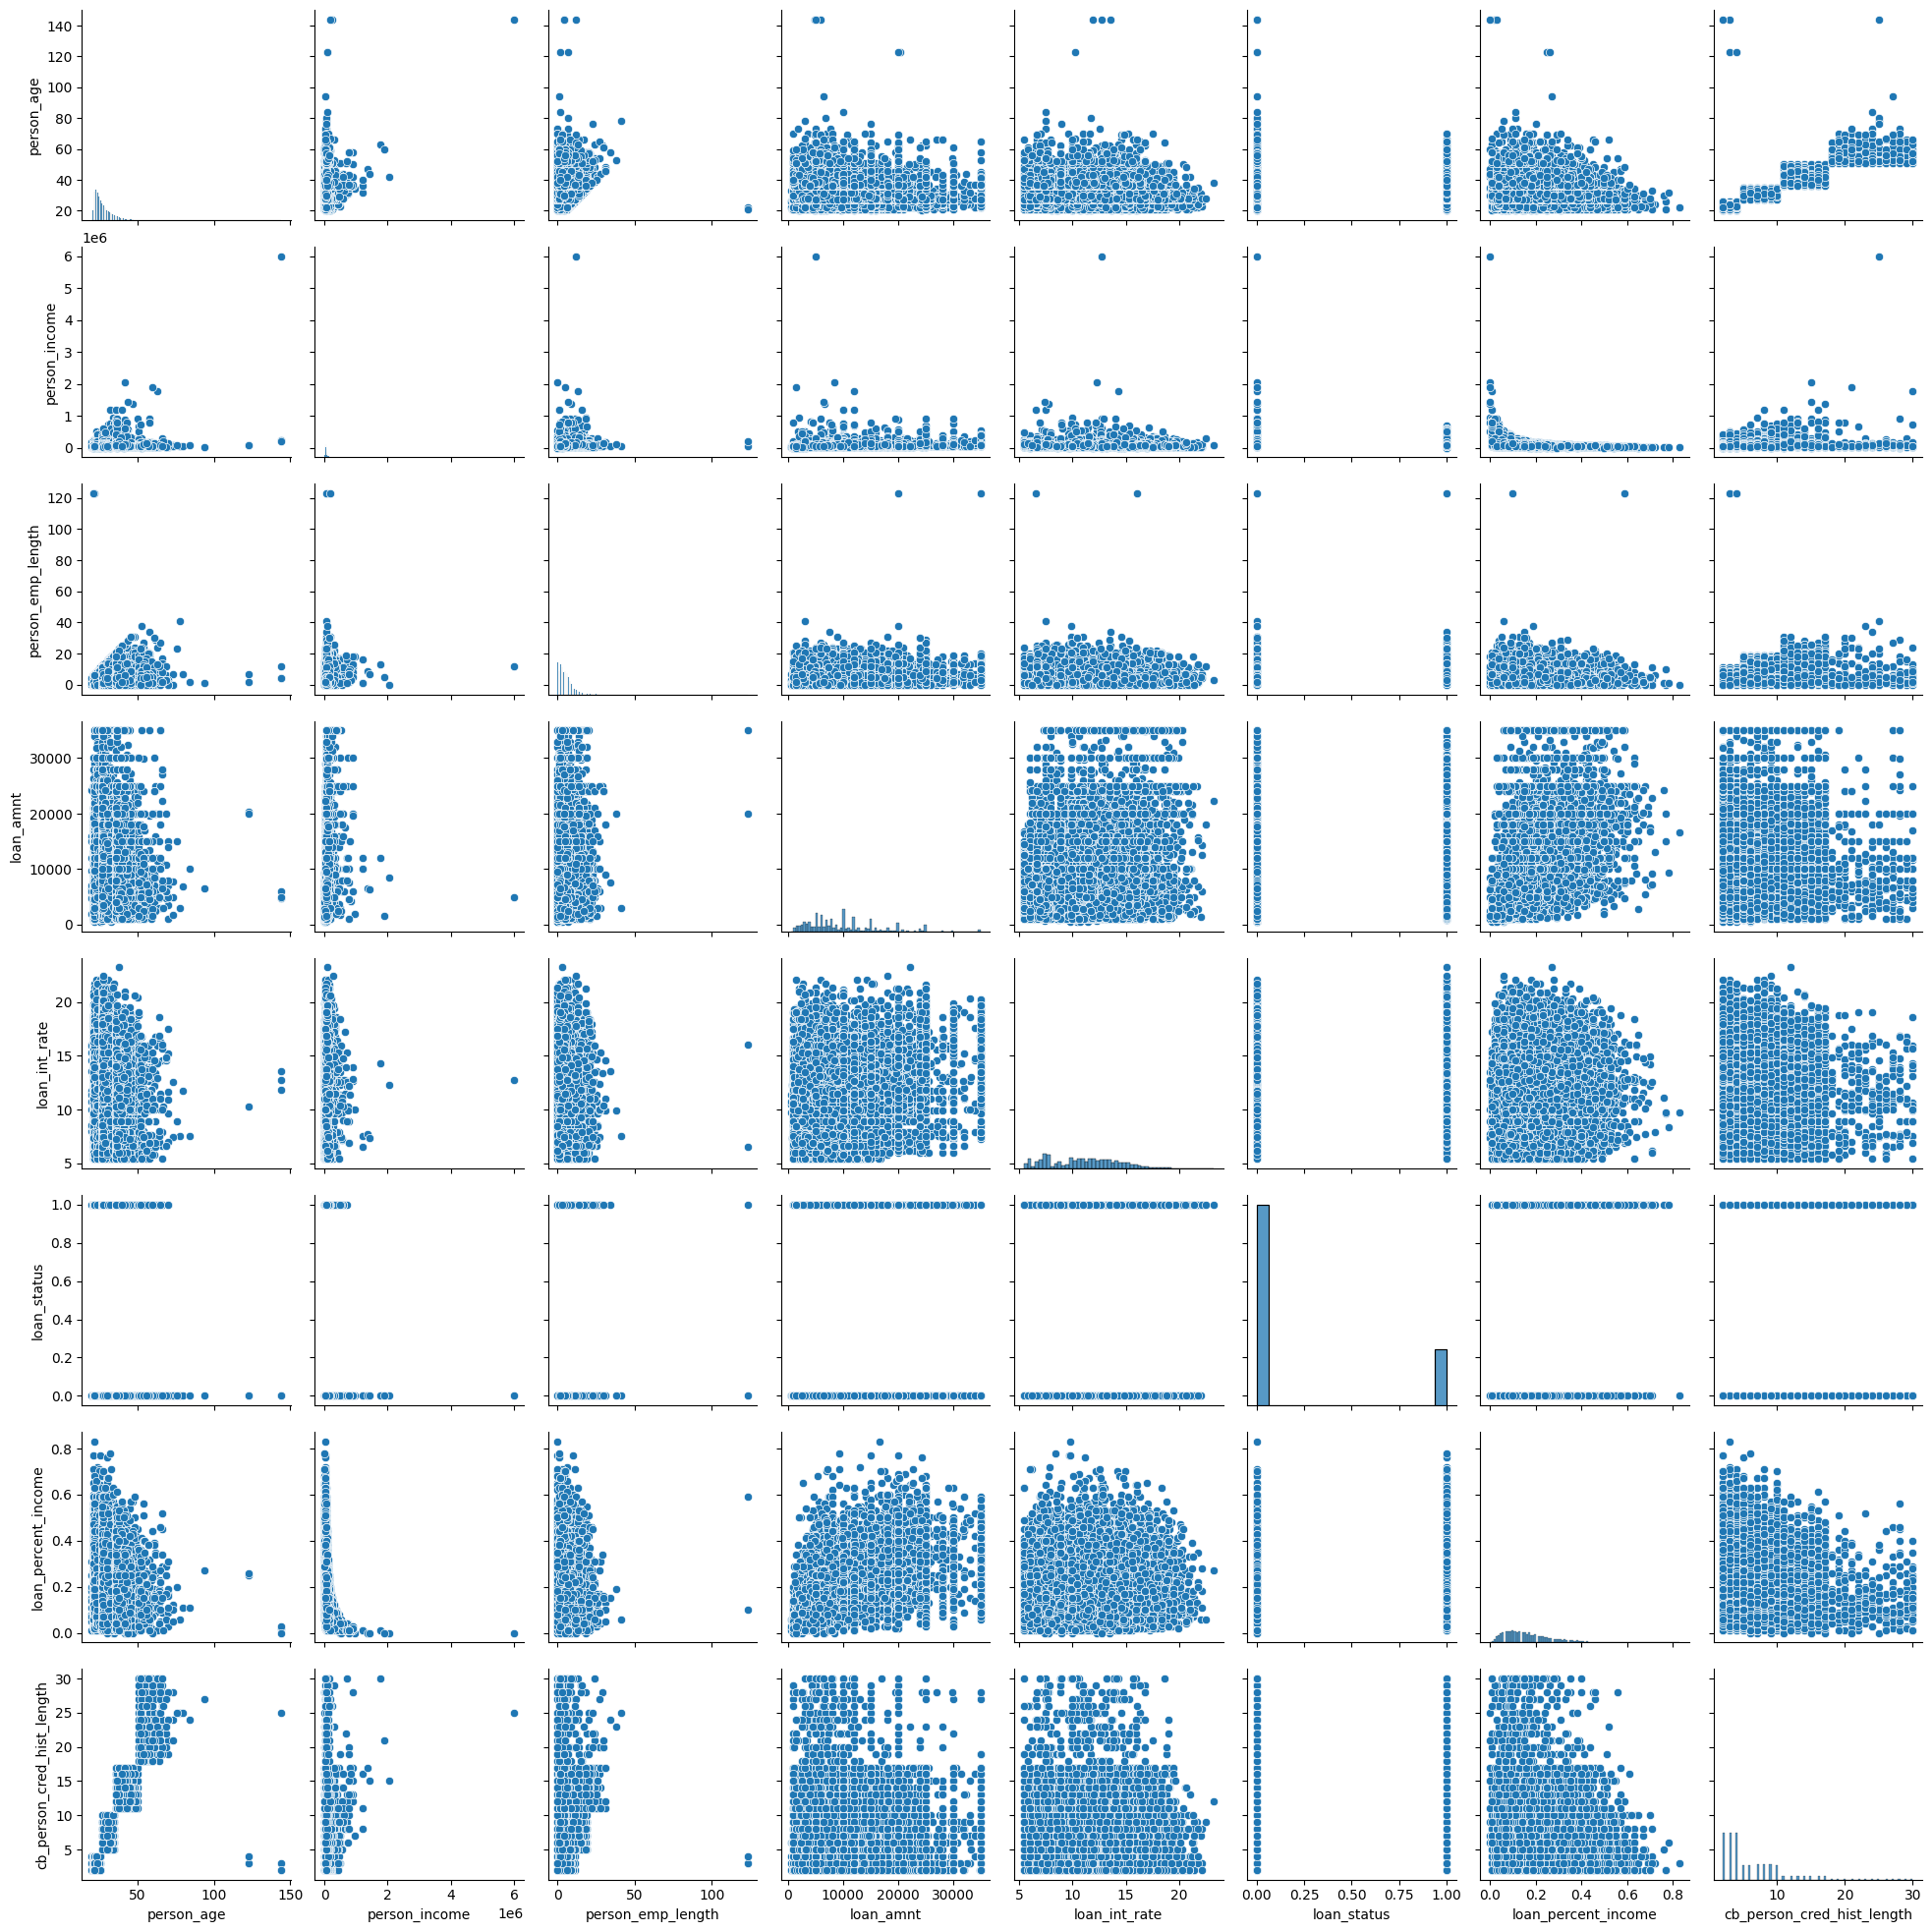

In [9]:
sns.pairplot(data)

Построим гистограмму и вычислим описательную статистику для каждого числового показателя

<Axes: xlabel='person_age', ylabel='Count'>

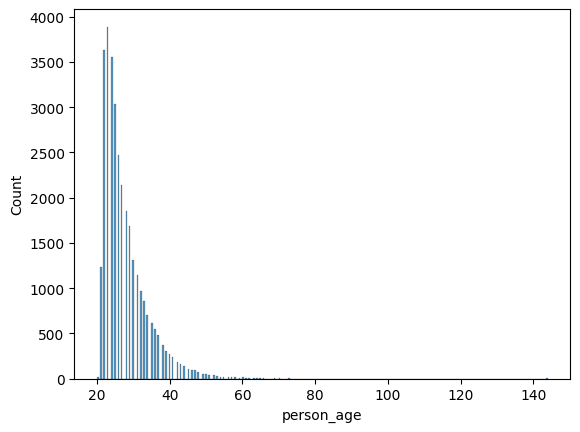

In [10]:
sns.histplot(data['person_age'])

<Axes: ylabel='person_age'>

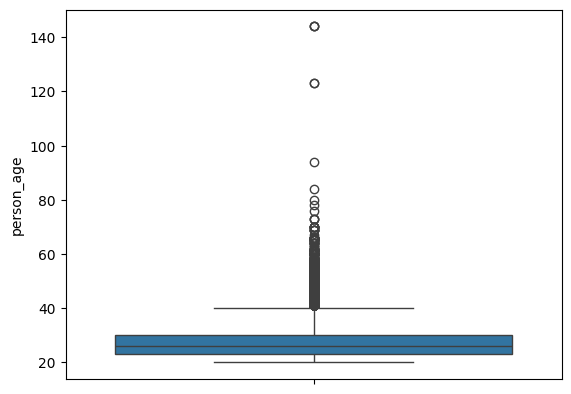

In [11]:
sns.boxplot(data['person_age'])

In [12]:
data['person_age'].describe()

,person_age
count,32581.000000
mean,27.734600
std,6.348078
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,144.000000


С учётом выбросов, средний возраст людей около 27 лет. Уберем выбросы.

Теперь посчитаем квантили:

In [13]:
data['person_age'].quantile(0.97)

43.0

97% меньше 38 лет.

In [14]:
data = data[data['person_age'] <= 38.0]

<Axes: ylabel='person_age'>

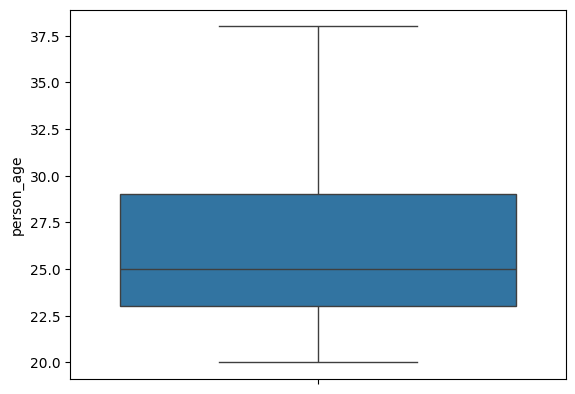

In [15]:
sns.boxplot(data['person_age'])

In [16]:
data_stats = data.describe()

In [17]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


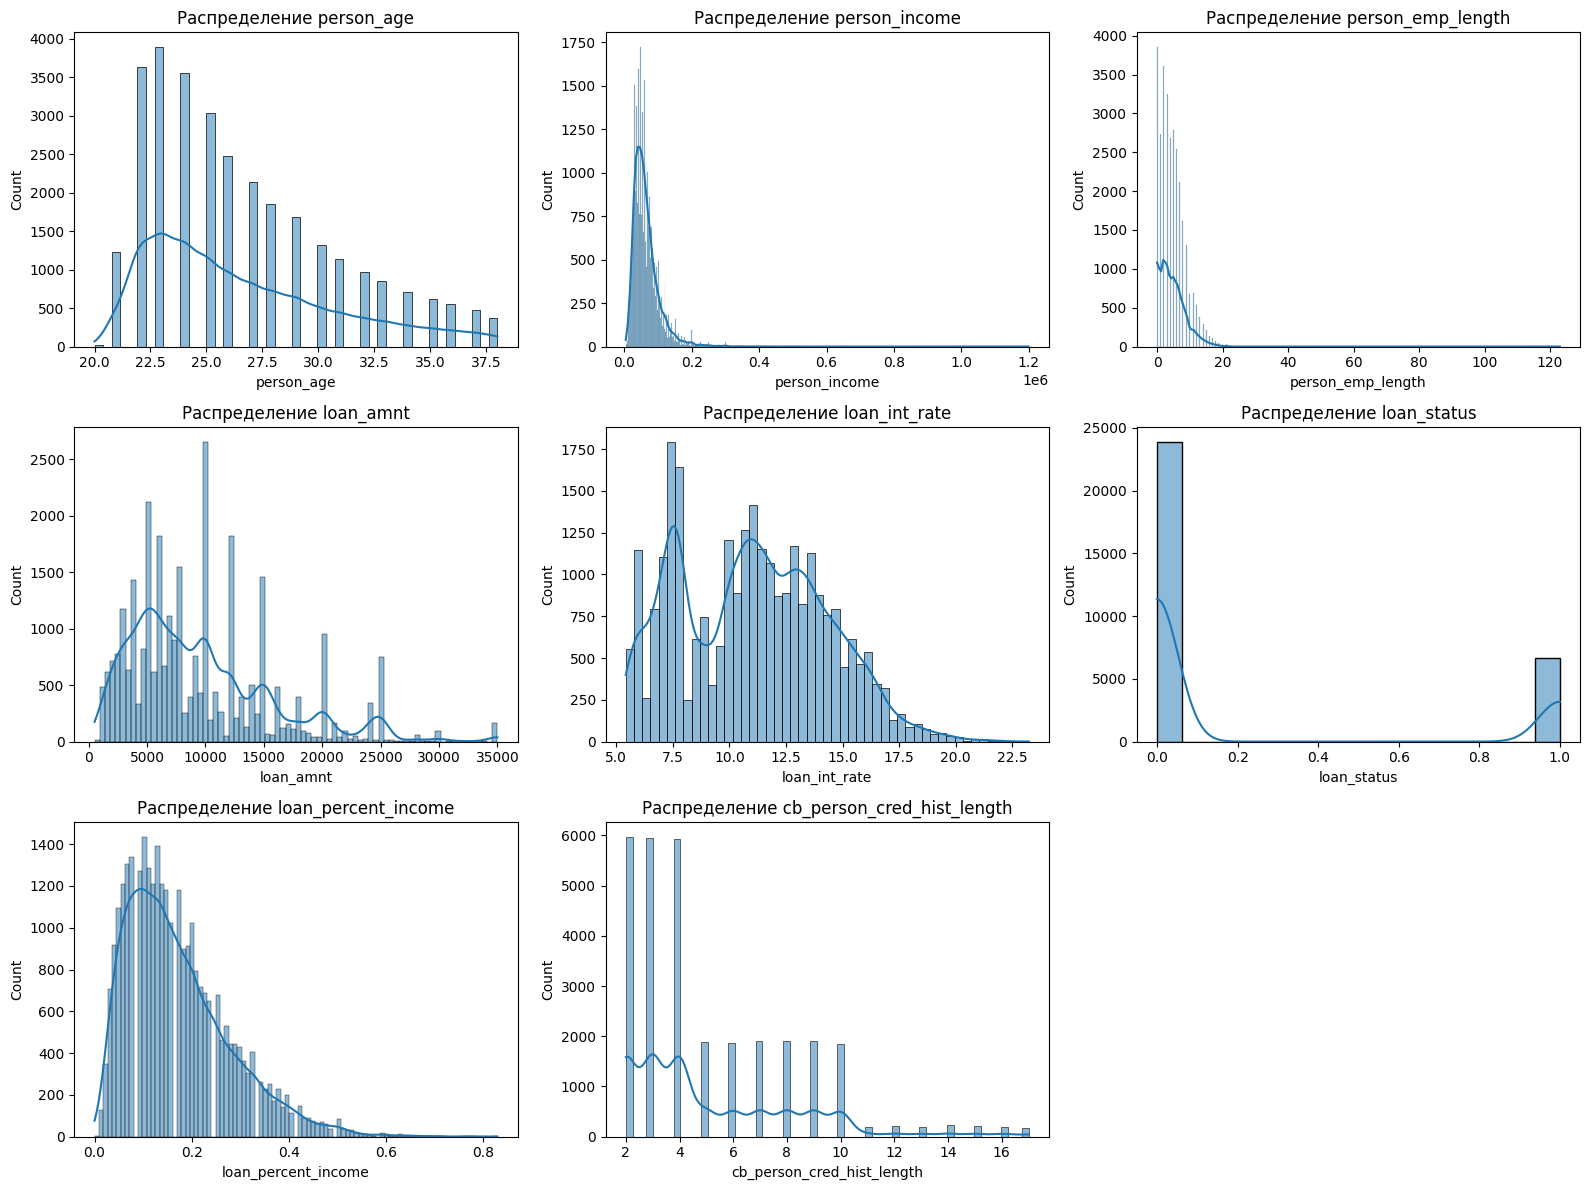

In [18]:

plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f"Распределение {column}")
plt.tight_layout()

<Axes: xlabel='person_income', ylabel='Count'>

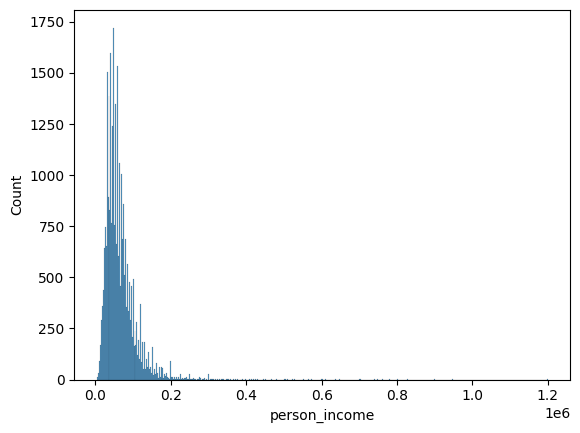

In [19]:
sns.histplot(data['person_income'])

In [20]:
data['person_income'].describe()

,person_income
count,3.051400e+04
mean,6.483052e+04
std,4.529829e+04
min,4.080000e+03
25%,3.840000e+04
50%,5.500000e+04
75%,7.841025e+04
max,1.200000e+06


Средний доход у заёмщиков 64830 долларов в год с учётом выбросов.
Максимальный доход у одного заёмщика 1200000.

In [21]:
person_with_high_income = data[data['person_income'] == 1200000]
print(person_with_high_income)

       person_age  person_income person_home_ownership  person_emp_length  \
17833          32        1200000              MORTGAGE                1.0   
29119          36        1200000                   OWN               16.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
17833     VENTURE          A      12000           7.51            0   
29119     MEDICAL          A      10000           6.54            0   

       loan_percent_income cb_person_default_on_file  \
17833                 0.01                         N   
29119                 0.01                         N   

       cb_person_cred_hist_length  
17833                           8  
29119                          11  


<Axes: ylabel='person_income'>

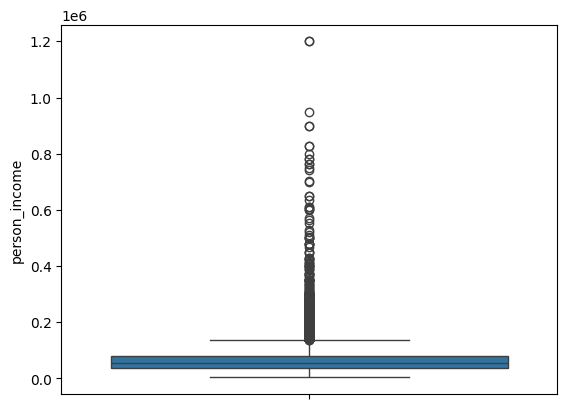

In [22]:
sns.boxplot(data['person_income'])

In [23]:
data['person_income'].quantile(0.93)

121683.78

Максимальный доход среди 93 процентов заёмщиков - 124755.

In [24]:
data = data[data['person_income'] <= 124755]

<Axes: ylabel='person_income'>

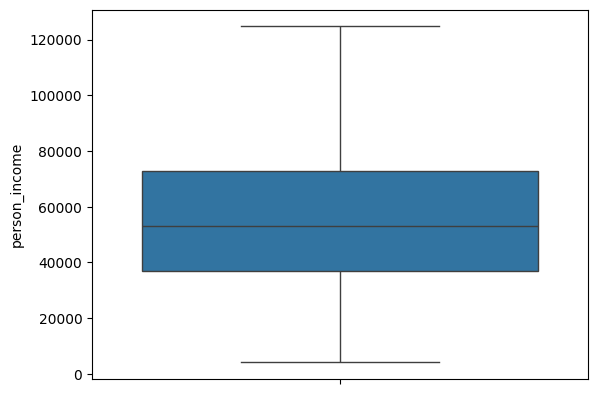

In [25]:
sns.boxplot(data['person_income'])

In [26]:
data['loan_amnt'].describe()

,loan_amnt
count,28466.000000
mean,9150.382035
std,5917.908025
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12000.000000
max,35000.000000


С учетом выбросов средний кредит - 9163 долларов. Максимальная сумма кредита - 35000.

In [27]:
data['loan_amnt'].quantile(0.95)

20000.0

<Axes: ylabel='loan_amnt'>

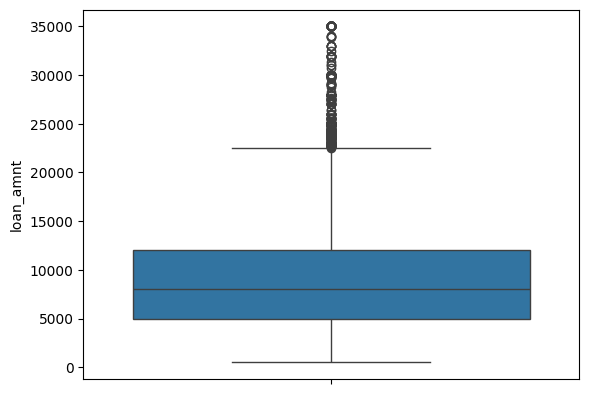

In [28]:
sns.boxplot(data['loan_amnt'])

In [29]:
data = data[data['loan_amnt'] <= 20300]

<Axes: ylabel='loan_amnt'>

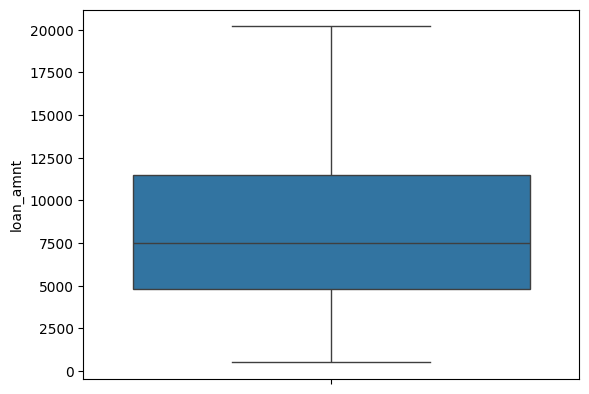

In [30]:
sns.boxplot(data['loan_amnt'])

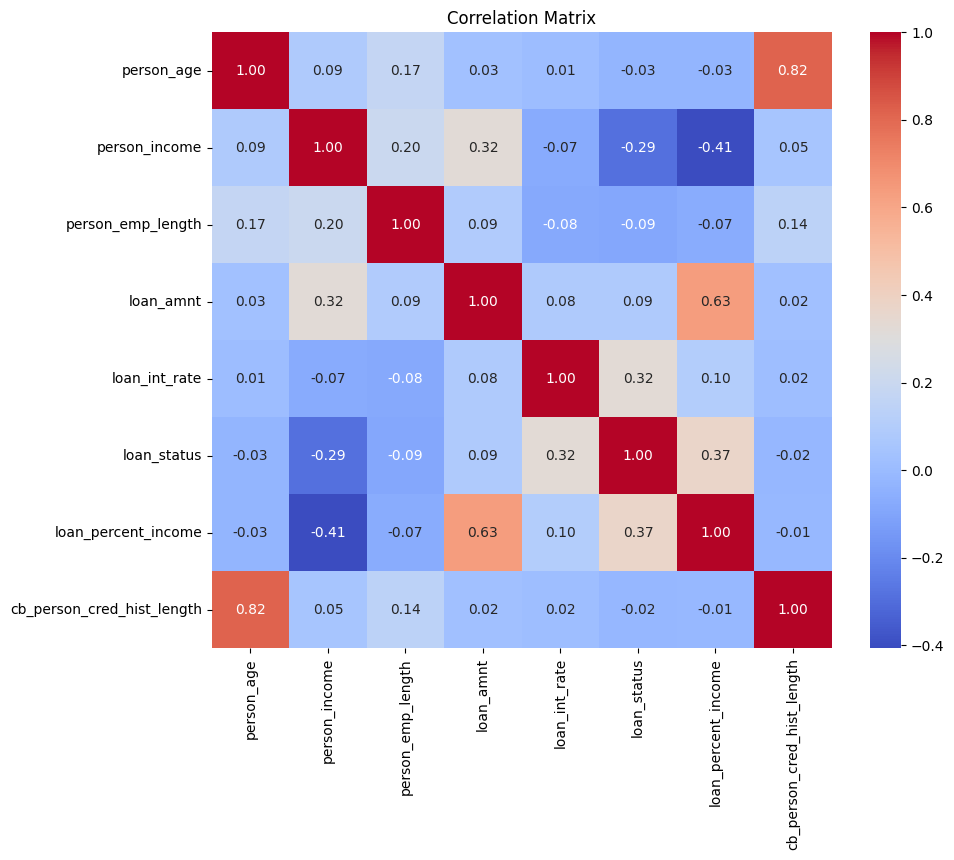

In [31]:
numeric_df = data.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
abs(correlation_matrix > 0.4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,True,False,False,False,False,False,False,True
person_income,False,True,False,False,False,False,False,False
person_emp_length,False,False,True,False,False,False,False,False
loan_amnt,False,False,False,True,False,False,True,False
loan_int_rate,False,False,False,False,True,False,False,False
loan_status,False,False,False,False,False,True,False,False
loan_percent_income,False,False,False,True,False,False,True,False
cb_person_cred_hist_length,True,False,False,False,False,False,False,True


Наблюдается корреляция между возрастом и длинной кредитной истории(кластеры).
Почти все рассматриваемые величины практически независимы.

In [33]:
data['loan_int_rate'].describe()

,loan_int_rate
count,24485.000000
mean,10.904019
std,3.201310
min,5.420000
25%,7.880000
50%,10.990000
75%,13.300000
max,22.110000


Средний процент по кредиту - 10%. Максимальный - 22%.

3. Обработать пропущенные значения.
Посмотрим, сколько у нас пропущенных значений:


In [34]:
print(data.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              805
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2572
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Обработаем пропущенные значения. Заменим их на медианные.

In [35]:
for column in data.select_dtypes(include=["number"]).columns:
  data[column].fillna(data[column].median(), inplace=True)


print(data.isna().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ipython-input-35-ee47ab4f2487>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


4. Обработать категориальные признаки:



In [36]:
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

# Просмотрим данные после преобразования
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False
9,21,10000,6.0,1600,14.74,1,0.16,3,False,True,...,False,False,True,False,False,True,False,False,False,False
11,21,10000,2.0,4500,8.63,1,0.45,2,False,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
data = data.astype(int)
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5,1000,11,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1,5500,12,1,0,3,0,0,...,1,0,0,0,1,0,0,0,0,0
5,21,9900,2,2500,7,1,0,2,0,1,...,0,0,1,0,0,0,0,0,0,0
9,21,10000,6,1600,14,1,0,3,0,1,...,0,0,1,0,0,1,0,0,0,0
11,21,10000,2,4500,8,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


5. Провести нормализацию.


In [38]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,-1.293061,-1.856273,0.126935,-1.552383,0.229037,0,0.0,-0.991650,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.341421,-1.856273,-0.961652,-0.597787,0.554274,1,0.0,-0.670285,0,0,...,1,0,0,0,1,0,0,0,0,0
5,-1.293061,-1.844118,-0.689505,-1.234185,-1.071910,1,0.0,-0.991650,0,1,...,0,0,1,0,0,0,0,0,0,0
9,-1.293061,-1.840066,0.399082,-1.425104,1.204748,1,0.0,-0.670285,0,1,...,0,0,1,0,0,1,0,0,0,0
11,-1.293061,-1.840066,-0.689505,-0.809920,-0.746673,1,0.0,-0.991650,0,1,...,0,0,0,0,0,0,0,0,0,0


6. Разбить данные на обучающую и тестовую выборки.


In [39]:
from sklearn.model_selection import train_test_split
X = data.drop('loan_status', axis=1)
y = data['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (20292, 22)
Размер тестовой выборки: (6765, 22)


7. Запустить классификатор ближайших соседей.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (20292, 22)
Размер тестовой выборки: (6765, 22)


Подберем k^

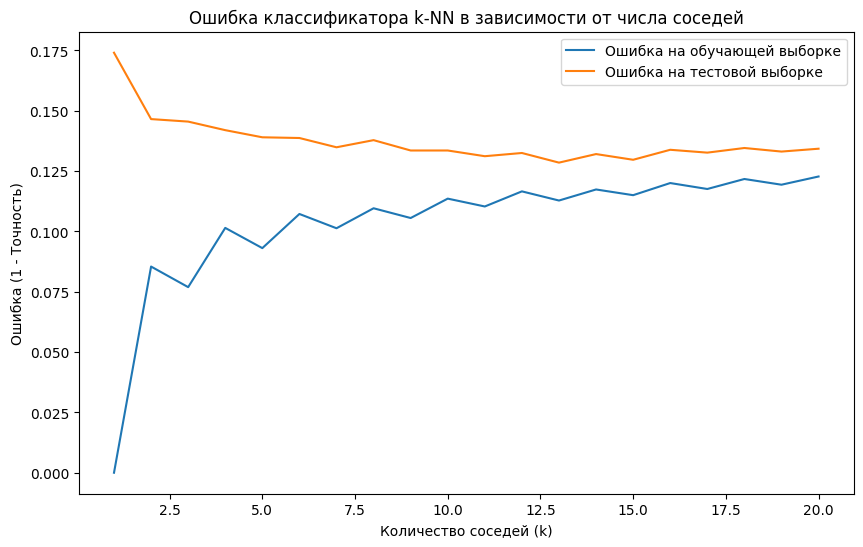

Оптимальное количество соседей: 13


In [41]:
train_errors = []
test_errors = []
neighbors_range = range(1, 21)

#Поиск оптимального k
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    train_errors.append(1 - train_accuracy)

    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(1 - test_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_errors, label="Ошибка на обучающей выборке")
plt.plot(neighbors_range, test_errors, label="Ошибка на тестовой выборке")
plt.xlabel("Количество соседей (k)")
plt.ylabel("Ошибка (1 - Точность)")
plt.legend()
plt.title("Ошибка классификатора k-NN в зависимости от числа соседей")
plt.show()


optimal_k = neighbors_range[test_errors.index(min(test_errors))]
print("Оптимальное количество соседей:", optimal_k)

In [42]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)


knn_optimal.fit(X_train, y_train)


y_test_predict = knn_optimal.predict(X_test)

knn_fixed = KNeighborsClassifier(n_neighbors=13)
knn_fixed.fit(X_train, y_train)

err_test = 1 - knn_optimal.score(X_test, y_test)
print(f"Ошибка на тестовой выборке: {err_test:.4f}")
train_accuracy_k13 = accuracy_score(y_train, knn_fixed.predict(X_train))
train_error_k13 = 1 - train_accuracy_k13
print(f"Ошибка на обучающей выборке при k=13: {train_error_k13:.4f}")


conf_matrix = confusion_matrix(y_test, y_test_predict)
print("Матрица ошибок:")
print(conf_matrix)

Ошибка на тестовой выборке: 0.1285
Ошибка на обучающей выборке при k=13: 0.1128
Матрица ошибок:
[[5118  130]
 [ 739  778]]


Выводы: модель демонстрирует небольшой уровень ошибки на тестовой выборке.
Матрица ошибок нам говорит, что 5118 - это количество правильных предсказаний для класса "кредит погашен", а 130 - количестве неверных предсказаний.
739 - это количество неверных предсказаний для класса "кредит не погашен", а 778 - правильных.
Оптимальным значением гиперпараметра k является 13. Это значение минимизирует ошибку на тестовой выборке.